In [2]:
import sys
import pandas as pd
import numpy as np
import ast
from multi_blade import MultiBlade
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
#from matplotlib_venn import venn3, venn3_circles, venn2
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from itertools import product
import ast

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
fig_width = 6  # inches
fig_height = 4  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 26,

    # Axes
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 20,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 4,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
})

## English Annotations (Audrey)

In [5]:
blade_en = MultiBlade(
    model_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20",
    source_path="/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated/df_1.parquet",
    lang = "EN",
    blade_state_path='/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_blade_state_EN_trained.pkl'
)

In [6]:
blade_raw = MultiBlade(
    model_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20",
    source_path="/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated/df_1.parquet",
    lang = "EN",
    blade_state_path='/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_blade_state_EN.pkl'
)

In [7]:
df_en = blade_en.df_docs[blade_en.df_docs.human_labeled==True]

In [8]:
aux = df_en[df_en.human_labeled==True]
indices_to_exclude = aux.id_top.values.tolist()
mask = np.ones(blade_raw.X_pool.shape[0], dtype=bool)  # Start with all True
mask[indices_to_exclude] = False

blade_en.X_pool = blade_raw.X_pool[mask]
df_pool = blade_raw.df_pool
blade_en.df_pool = df_pool[~df_pool.id_top.isin(aux.id_top.values.tolist())]

In [9]:
df_pool = blade_raw.df_pool
blade_en.df_pool = df_pool[~df_pool.id_top.isin(aux.id_top.values.tolist())]

In [10]:
pred_en = blade_en.predict(path_save = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_df_docs_predicted_EN.csv")

/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/active_learning/multi_blade.py:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_pool['predicted_label'] = [list(pred) for pred in predictions]
/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/active_learning/multi_blade.py:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_pool['human_labeled'] = False


In [11]:
"""
filtered_df = pred_en[
    (pred_en['predicted_label'].apply(tuple) == (1, 1, 1, 0)) |
    (pred_en['predicted_label'].apply(tuple) == (1, 0, 1, 0)) |
    (pred_en['predicted_label'].apply(tuple) == (0, 1, 1, 0))
]
filtered_df
"""

"\nfiltered_df = pred_en[\n    (pred_en['predicted_label'].apply(tuple) == (1, 1, 1, 0)) |\n    (pred_en['predicted_label'].apply(tuple) == (1, 0, 1, 0)) |\n    (pred_en['predicted_label'].apply(tuple) == (0, 1, 1, 0))\n]\nfiltered_df\n"

In [12]:
"""
filtered_df = pred_en[#
    ~(pred_en['predicted_label'].apply(tuple) == (0, 0, 0, 0))
]
len(filtered_df)
"""

"\nfiltered_df = pred_en[#\n    ~(pred_en['predicted_label'].apply(tuple) == (0, 0, 0, 0))\n]\nlen(filtered_df)\n"

## Spanish Annotations (Valerie)

In [13]:
blade_es = MultiBlade(
   model_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20",
    source_path="/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated/df_1.parquet",
    lang = "ES",
    blade_state_path='/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_blade_state_ES_trained.pkl'
)

In [14]:
blade_raw = MultiBlade(
    model_path = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20",
    source_path="/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated/df_1.parquet",
    lang = "ES",
    blade_state_path='/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_blade_state_ES.pkl'
)

In [15]:
df_es = blade_es.df_docs[blade_es.df_docs.human_labeled==True]

In [16]:
aux = df_es[df_es.human_labeled==True]
indices_to_exclude = aux.id_top.values.tolist()
mask = np.ones(blade_raw.X_pool.shape[0], dtype=bool)  # Start with all True
mask[indices_to_exclude] = False

blade_es.X_pool = blade_raw.X_pool[mask]
df_pool = blade_raw.df_pool
blade_es.df_pool = df_pool[~df_pool.id_top.isin(aux.id_top.values.tolist())]

In [17]:
df_pool = blade_raw.df_pool
blade_es.df_pool = df_pool[~df_pool.id_top.isin(aux.id_top.values.tolist())]

In [18]:
pred_es = blade_es.predict(path_save = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_df_docs_predicted_ES.csv")

/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/active_learning/multi_blade.py:334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_pool['predicted_label'] = [list(pred) for pred in predictions]
/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/src/active_learning/multi_blade.py:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_pool['human_labeled'] = False


In [20]:
"""
filtered_df_es = pred_es[
    (pred_es['predicted_label'].apply(tuple) == (1, 1, 1, 0)) |
    (pred_es['predicted_label'].apply(tuple) == (1, 0, 1, 0)) |
    (pred_es['predicted_label'].apply(tuple) == (0, 1, 1, 0))
]
filtered_df_es
"""

"\nfiltered_df_es = pred_es[\n    (pred_es['predicted_label'].apply(tuple) == (1, 1, 1, 0)) |\n    (pred_es['predicted_label'].apply(tuple) == (1, 0, 1, 0)) |\n    (pred_es['predicted_label'].apply(tuple) == (0, 1, 1, 0))\n]\nfiltered_df_es\n"

## Second Evaluation (Karla)

In [21]:
df_second = pd.concat([pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/second_eval_annotations_upt_first.csv"),
                       pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/second_eval_annotations_upt.csv")])

In [22]:
len(df_second)

138

In [23]:
len(df_es)

69

In [24]:
len(df_en)

80

In [ ]:
#df_second[df_second.doc_id.str.contains("EN")].doc_id.values.tolist()
#df_en_non_labelled = df_en[~df_en.doc_id.isin(df_second[df_second.doc_id.str.contains("EN")].doc_id.values.tolist())].sample(n=31)
#df_en_non_labelled.to_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/df_en_non_labelled.csv")
#df_en_non_labelled

In [29]:
type(df_second.iloc[0].label)

list

## Kappa coefficient

In [27]:
#df_second = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/second_eval_annotations_upt_first.csv")
df_second["label"] = df_second["label"].apply(lambda x: [int(el) for el in ast.literal_eval(x)])
df_second["third_eval_label"] = df_second["third_eval_label"].apply(lambda x: [int(el) for el in x.split(",")])

In [33]:
df_second_en = df_second[df_second.doc_id.str.contains("EN")]
df_second_es = df_second[df_second.doc_id.str.contains("ES")]

In [34]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Supongamos que ya tienes el DataFrame `df_second`

# Aplanar las listas de anotaciones
labels_user1 = [label for sublist in df_second_en['label'] for label in sublist]
labels_user2 = [label for sublist in df_second_en['third_eval_label'] for label in sublist]

# Asegúrate de que ambas listas tienen la misma longitud
assert len(labels_user1) == len(labels_user2), "Las listas de anotaciones no tienen la misma longitud."

# Calcular Cohen's Kappa
kappa = cohen_kappa_score(labels_user1, labels_user2)
print(f"Cohen's Kappa: {kappa}")

categories = range(len(df_second_en.iloc[0].label))  # Número de categorías (asumiendo que todas las listas tienen la misma longitud)
category_kappas = {}

for category in categories:
    # Extraer los valores binarios para la categoría actual
    user1_category = [label[category] for label in df_second_en['label']]
    user2_category = [label[category] for label in df_second_en['third_eval_label']]
    
    # Calcular Cohen's Kappa para esta categoría
    kappa = cohen_kappa_score(user1_category, user2_category)
    category_kappas[f'Category {category}'] = kappa

# Imprimir resultados
for category, kappa in category_kappas.items():
    print(f'{category}: Cohen\'s Kappa = {kappa}')

Cohen's Kappa: 0.4303106633081444
Category 0: Cohen's Kappa = 0.24762574744987698
Category 1: Cohen's Kappa = 0.5678496868475991
Category 2: Cohen's Kappa = 0.33009708737864074
Category 3: Cohen's Kappa = 0.24836601307189543


In [35]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Supongamos que ya tienes el DataFrame `df_second`

# Aplanar las listas de anotaciones
labels_user1 = [label for sublist in df_second_es['label'] for label in sublist]
labels_user2 = [label for sublist in df_second_es['third_eval_label'] for label in sublist]

# Asegúrate de que ambas listas tienen la misma longitud
assert len(labels_user1) == len(labels_user2), "Las listas de anotaciones no tienen la misma longitud."

# Calcular Cohen's Kappa
kappa = cohen_kappa_score(labels_user1, labels_user2)
print(f"Cohen's Kappa: {kappa}")

categories = range(len(df_second_es.iloc[0].label))  # Número de categorías (asumiendo que todas las listas tienen la misma longitud)
category_kappas = {}

for category in categories:
    # Extraer los valores binarios para la categoría actual
    user1_category = [label[category] for label in df_second_es['label']]
    user2_category = [label[category] for label in df_second_es['third_eval_label']]
    
    # Calcular Cohen's Kappa para esta categoría
    kappa = cohen_kappa_score(user1_category, user2_category)
    category_kappas[f'Category {category}'] = kappa

# Imprimir resultados
for category, kappa in category_kappas.items():
    print(f'{category}: Cohen\'s Kappa = {kappa}')

Cohen's Kappa: 0.6365595259472078
Category 0: Cohen's Kappa = 0.5523114355231143
Category 1: Cohen's Kappa = 0.7566137566137566
Category 2: Cohen's Kappa = 0.6784049715173486
Category 3: Cohen's Kappa = 0.38242473555736367


In [ ]:
categories = ['health', 'kids', 'mothers', 'social_services']

for i, category in enumerate(categories):
    df_second[f'label_{category}'] = df_second['label'].apply(lambda x: x[i])
    df_second[f'third_eval_label_{category}'] = df_second['third_eval_label'].apply(lambda x: x[i])

df_second[['id_top', 'doc_id', 'text',  'label',  'third_eval_label']]

In [ ]:
non_agreement = df_second[df_second.label != df_second.third_eval_label][['id_top', 'doc_id', 'text',  'label',  'third_eval_label']]
non_agreement.to_excel("non_agreement_es.xlsx")

In [ ]:
agreement = df_second[df_second.label == df_second.third_eval_label][['id_top', 'doc_id', 'text',  'label',  'third_eval_label']]
agreement.to_excel("agreement_es.xlsx")
len(agreement)

In [ ]:
def calculate_kappa(df, categories):
    # Cohen's Kappa for each category
    kappa_scores = {}
    
    for category in categories:
        kappa = cohen_kappa_score(df[f'label_{category}'], df[f'third_eval_label_{category}'])
        kappa_scores[category] = kappa
    
    # Mean Kappa score across all categories
    mean_kappa = np.mean(list(kappa_scores.values()))
    
    print("Kappa scores by category:")
    for category, kappa in kappa_scores.items():
        print(f"{category}: {kappa}")
    
    print(f"\nMean Cohen's Kappa coefficient (total agreement): {mean_kappa}")

    return list(kappa_scores.values())

print("-- KAPPA ENGLISH ANNOTATIONS --")
df_second_en = df_second[df_second.doc_id.str.contains("EN")]
english_scores = calculate_kappa(df_second_en, categories=['health', 'kids', 'mothers', 'social_services'])

print("-- KAPPA SPANISH ANNOTATIONS --")
df_second_es = df_second[df_second.doc_id.str.contains("ES")]
spanish_scores = calculate_kappa(df_second_es, categories=['health', 'kids', 'mothers', 'social_services'])

print("-- KAPPA ALL ANNOTATIONS --")
all_scores = calculate_kappa(df_second, categories=['health', 'kids', 'mothers', 'social_services'])

In [43]:
def calculate_kappa(df, categories):
    # Cohen's Kappa for each category
    kappa_scores = {}

    for category in categories:
        kappa = cohen_kappa_score(df[f'label_{category}'], df[f'third_eval_label_{category}'])
        kappa_scores[category] = kappa
    
    # Check for "No Category" agreement (all categories are 0)
    df['no_category_label'] = (df[[f'label_{category}' for category in categories]].sum(axis=1) == 0)
    df['no_category_eval'] = (df[[f'third_eval_label_{category}' for category in categories]].sum(axis=1) == 0)
    
    no_category_kappa = cohen_kappa_score(df['no_category_label'], df['no_category_eval'])
    kappa_scores['no_category'] = no_category_kappa
    
    # Mean Kappa score across all categories (including 'No Category')
    mean_kappa = np.mean(list(kappa_scores.values()))
    
    print("Kappa scores by category:")
    for category, kappa in kappa_scores.items():
        print(f"{category}: {kappa}")
    
    print(f"\nMean Cohen's Kappa coefficient (total agreement): {mean_kappa}")

    return list(kappa_scores.values())

# Example Usage
print("-- KAPPA ENGLISH ANNOTATIONS --")
#df_second_en = pd.merge(df_en, df_second, on='doc_id')
#df_second_en = df_second[df_second.doc_id.str.contains("EN")]
english_scores = calculate_kappa(df_second_en, categories=['health', 'kids', 'mothers', 'social_services'])

print("-- KAPPA SPANISH ANNOTATIONS --")
#df_second_es = pd.merge(df_es, df_second, on='doc_id')
#df_second_es = df_second[df_second.doc_id.str.contains("ES")]
spanish_scores = calculate_kappa(df_second_es, categories=['health', 'kids', 'mothers', 'social_services'])

print("-- KAPPA ALL ANNOTATIONS --")
all_scores = calculate_kappa(df_second, categories=['health', 'kids', 'mothers', 'social_services'])

-- KAPPA ENGLISH ANNOTATIONS --
Kappa scores by category:
health: 0.24762574744987698
kids: 0.5678496868475991
mothers: 0.33009708737864074
social_services: 0.24836601307189543
no_category: 0.1562500000000001

Mean Cohen's Kappa coefficient (total agreement): 0.3100377069496025
-- KAPPA SPANISH ANNOTATIONS --
Kappa scores by category:
health: 0.5523114355231143
kids: 0.7566137566137566
mothers: 0.6784049715173486
social_services: 0.38242473555736367
no_category: 0.5997322623828648

Mean Cohen's Kappa coefficient (total agreement): 0.5938974323188896
-- KAPPA ALL ANNOTATIONS --
Kappa scores by category:
health: 0.38427947598253276
kids: 0.6994619523443505
mothers: 0.5861379540153282
social_services: 0.32258064516129037
no_category: 0.32929974211465973

Mean Cohen's Kappa coefficient (total agreement): 0.46435195392363227


/tmp/ipykernel_3913235/2065856999.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_category_label'] = (df[[f'label_{category}' for category in categories]].sum(axis=1) == 0)
/tmp/ipykernel_3913235/2065856999.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_category_eval'] = (df[[f'third_eval_label_{category}' for category in categories]].sum(axis=1) == 0)
/tmp/ipykernel_3913235/2065856999.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [65]:
#columns_keep = ["doc_id"] + [col for col in df_second.columns if (col.startswith("label") or col.startswith("third"))]
#df_second[columns_keep]
#df_second[columns_keep].to_csv("labels.csv")

\begin{table*}[ht]
\centering
\resizebox{\textwidth}{!}{%
\begin{tabular}{{{column_format}}}
\toprule
Language & None & SS & M & SS, M & K & K, SS & K, M & K, SS, M & H & H, SS & H, M & H, SS, M & H, K & H, K, SS & H, K, M & H, K, SS, M \\
\midrule
English & 0.22 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.26 & 0.00 & 0.00 & 0.00 & 0.22 & 0.00 & 0.38 & 0.00 \\
Spanish & 0.58 & 0.00 & 0.00 & 0.00 & 1.00 & 0.50 & 0.25 & 0.25 & 0.41 & 0.00 & 0.50 & 0.00 & 0.50 & 0.00 & 0.33 & 0.00 \\
All & 0.36 & 0.00 & 0.00 & 0.00 & 1.00 & 0.33 & 0.25 & 0.25 & 0.31 & 0.00 & 0.20 & 0.00 & 0.35 & 0.00 & 0.35 & 0.00 \\
\bottomrule
\end{tabular}%
}
\caption{Agreement by category combination across languages. Categories: H = Health, K = Kids, M = Mothers, SS = Social Services.}
\label{tab:language_comb_agreement}
\end{table*}



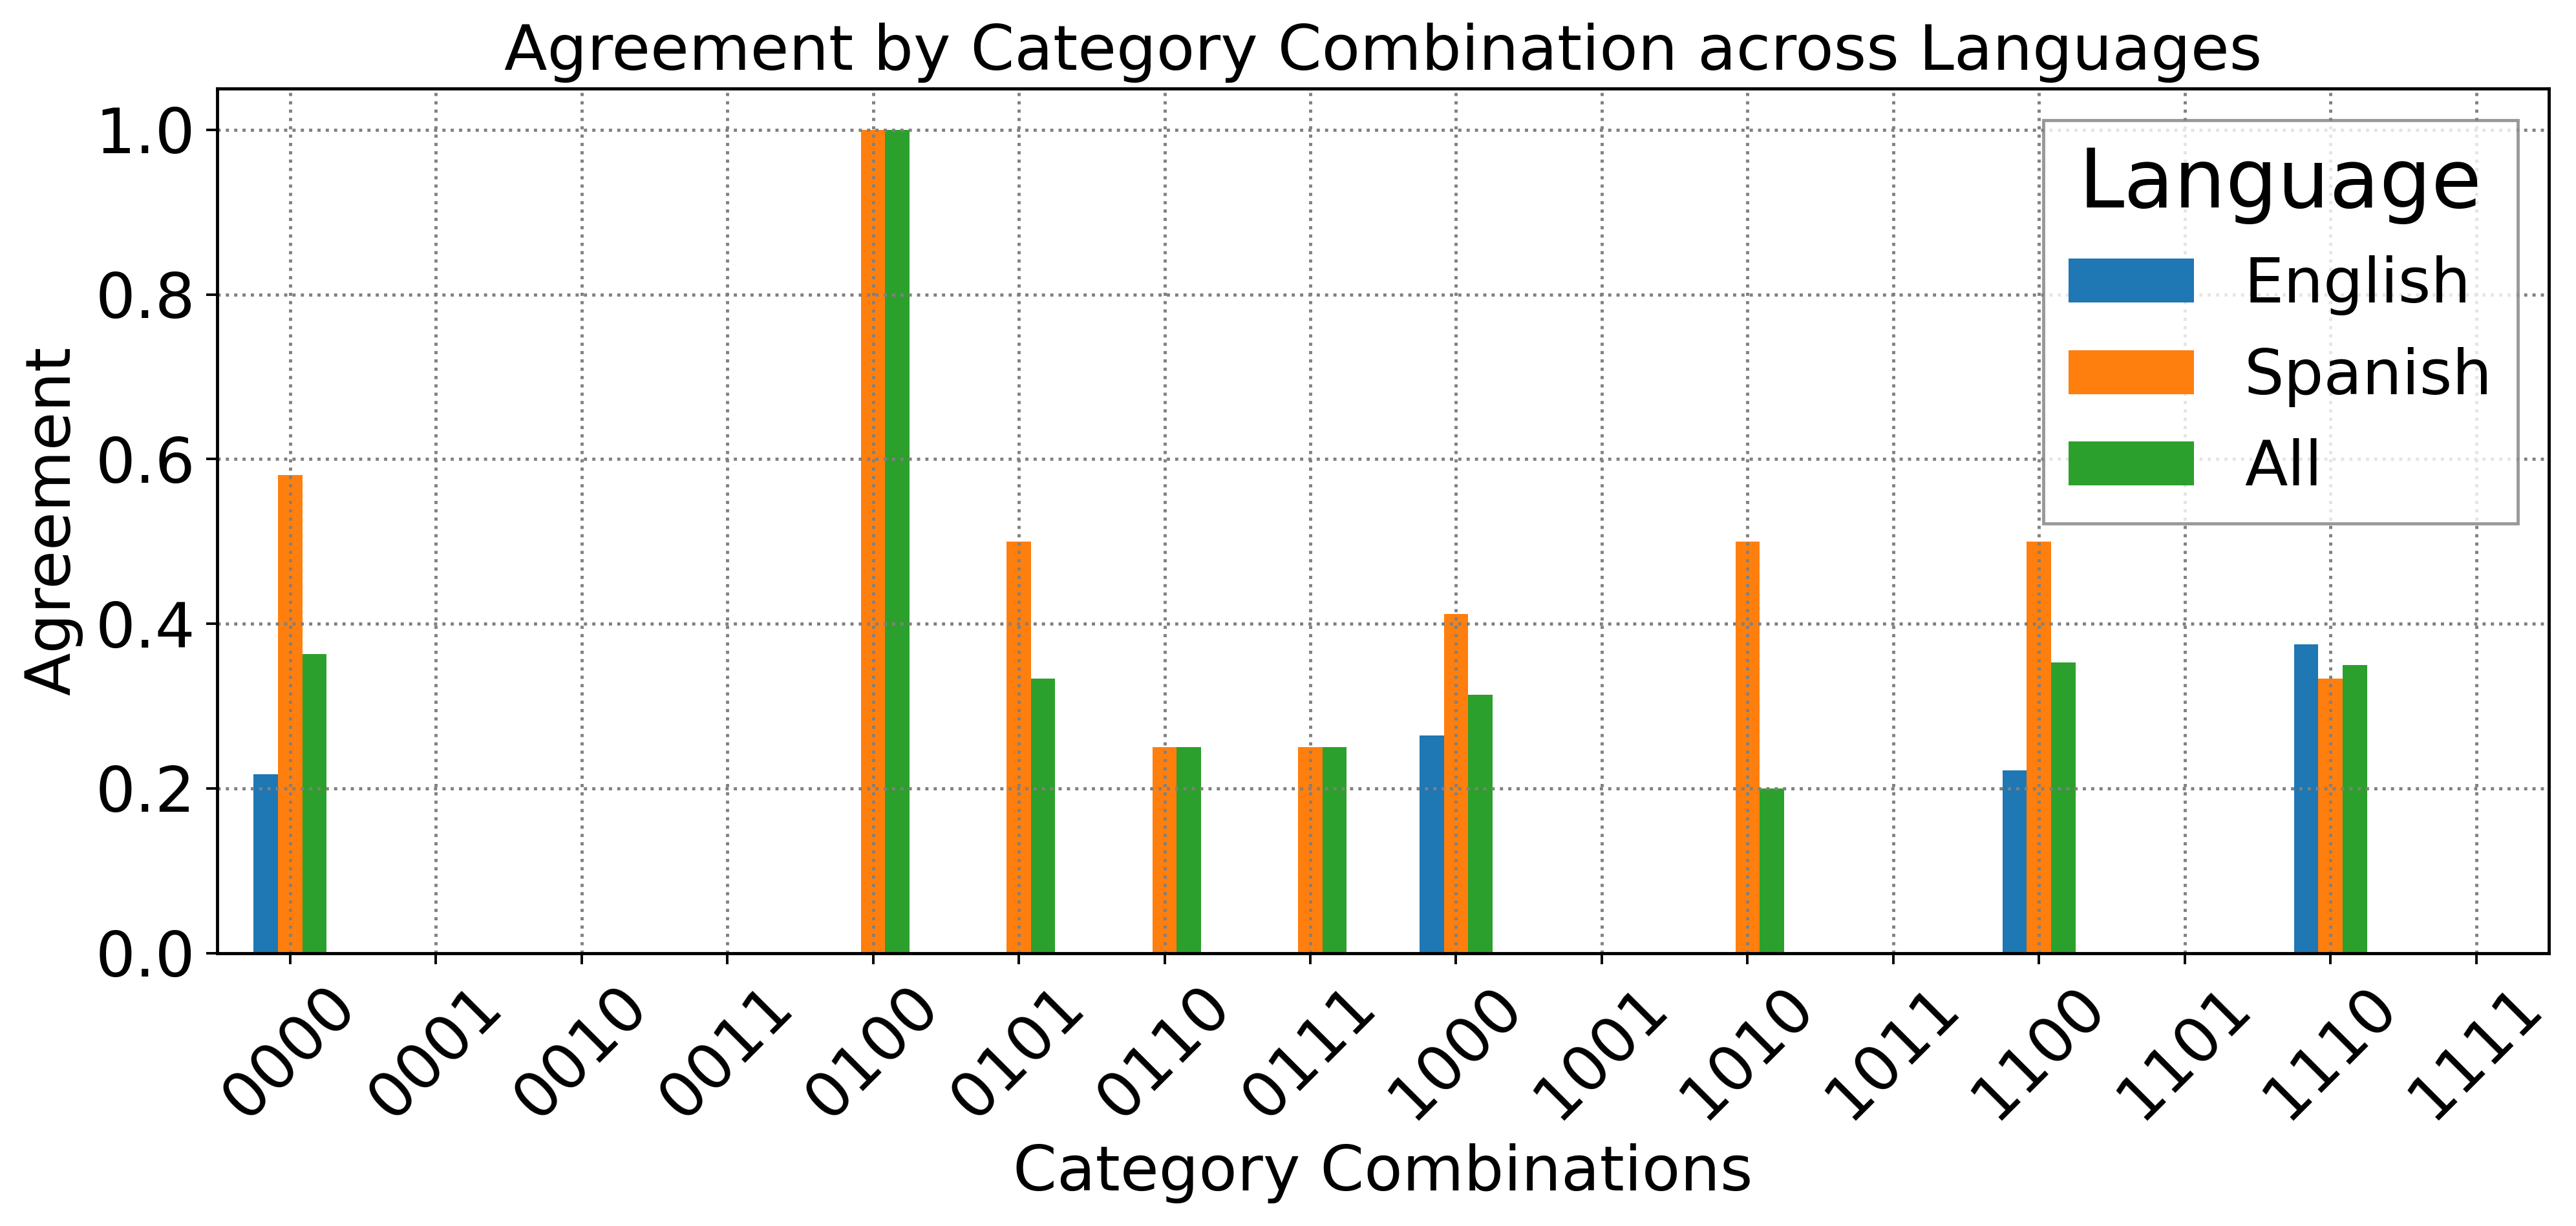

In [44]:

def calculate_combination_agreement(df, categories, language_label):
    # Generate all possible combinations of categories
    combinations = list(product([0, 1], repeat=len(categories)))
    combination_labels = [''.join(map(str, comb)) for comb in combinations]
    
    # Dictionary to store agreement for each combination
    combination_agreement = {}

    for comb, label in zip(combinations, combination_labels):
        # Create binary masks for this combination
        mask_evaluator_1 = (df[[f'label_{cat}' for cat, val in zip(categories, comb)]].values == comb).all(axis=1)
        mask_evaluator_2 = (df[[f'third_eval_label_{cat}' for cat, val in zip(categories, comb)]].values == comb).all(axis=1)
        
        # Agreement where both evaluators match this combination
        agreement = np.sum(mask_evaluator_1 & mask_evaluator_2)
        total = np.sum(mask_evaluator_1 | mask_evaluator_2)
        
        # Proportion of agreement
        proportion = agreement / total if total > 0 else 0
        combination_agreement[label] = proportion

    # Return as a DataFrame with a language label
    return pd.DataFrame([combination_agreement], index=[language_label])

def generate_latex_table_with_labels(agreement_combined):
    # Define custom headers for category combinations
    custom_headers = [
        "None", "SS", "M", "SS, M", "K", "K, SS", "K, M", "K, SS, M",
        "H", "H, SS", "H, M", "H, SS, M", "H, K", "H, K, SS", "H, K, M", "H, K, SS, M"
    ]
    
    # Ensure that the number of headers matches the number of category combinations
    assert len(custom_headers) == len(agreement_combined.columns) - 1, (
        f"Mismatch between headers ({len(custom_headers)}) and columns ({len(agreement_combined.columns) - 1})"
    )
    
    # Generate the LaTeX table header
    column_format = "l" + "c" * (len(custom_headers))  # First column is for Language
    header = (
        "\\begin{table*}[ht]\n"
        "\\centering\n"
        "\\resizebox{\\textwidth}{!}{%\n"
        "\\begin{tabular}{{{column_format}}}\n"
        "\\toprule\n"
        "Language & " + " & ".join(custom_headers) + " \\\\\n"
        "\\midrule\n"
    )

    # Generate the data rows
    rows = []
    for idx, row in agreement_combined.iterrows():
        row_values = " & ".join(f"{val:.2f}" for val in row[1:])  # Format all but the first column
        rows.append(f"{row['index']} & {row_values} \\\\")

    # Combine rows with header and footer
    footer = (
        "\\bottomrule\n"
        "\\end{tabular}%\n"
        "}\n"
        "\\caption{Agreement by category combination across languages. Categories: H = Health, K = Kids, M = Mothers, SS = Social Services.}\n"
        "\\label{tab:language_comb_agreement}\n"
        "\\end{table*}\n"
    )

    # Combine all parts into the final LaTeX table
    latex_table = header + "\n".join(rows) + "\n" + footer
    return latex_table

# Consolidate results for all datasets
categories = ["health", "kids", "mothers", "social_services"]
df_agreement_en = calculate_combination_agreement(df_second_en, categories, "English")
df_agreement_es = calculate_combination_agreement(df_second_es, categories, "Spanish")

df_agreement_all = calculate_combination_agreement(df_second, categories, "All")

# Combine into a single DataFrame
agreement_combined = pd.concat([df_agreement_en, df_agreement_es, df_agreement_all])

# Example usage
latex_table = generate_latex_table_with_labels(agreement_combined.reset_index())
print(latex_table)

# Visualize as a plot
agreement_combined.T.plot(kind='bar', figsize=(12, 6))
plt.title('Agreement by Category Combination across Languages')
plt.xlabel('Category Combinations')
plt.ylabel('Agreement')
plt.xticks(rotation=45)
plt.legend(title="Language", loc="upper right")
plt.tight_layout()
plt.show()

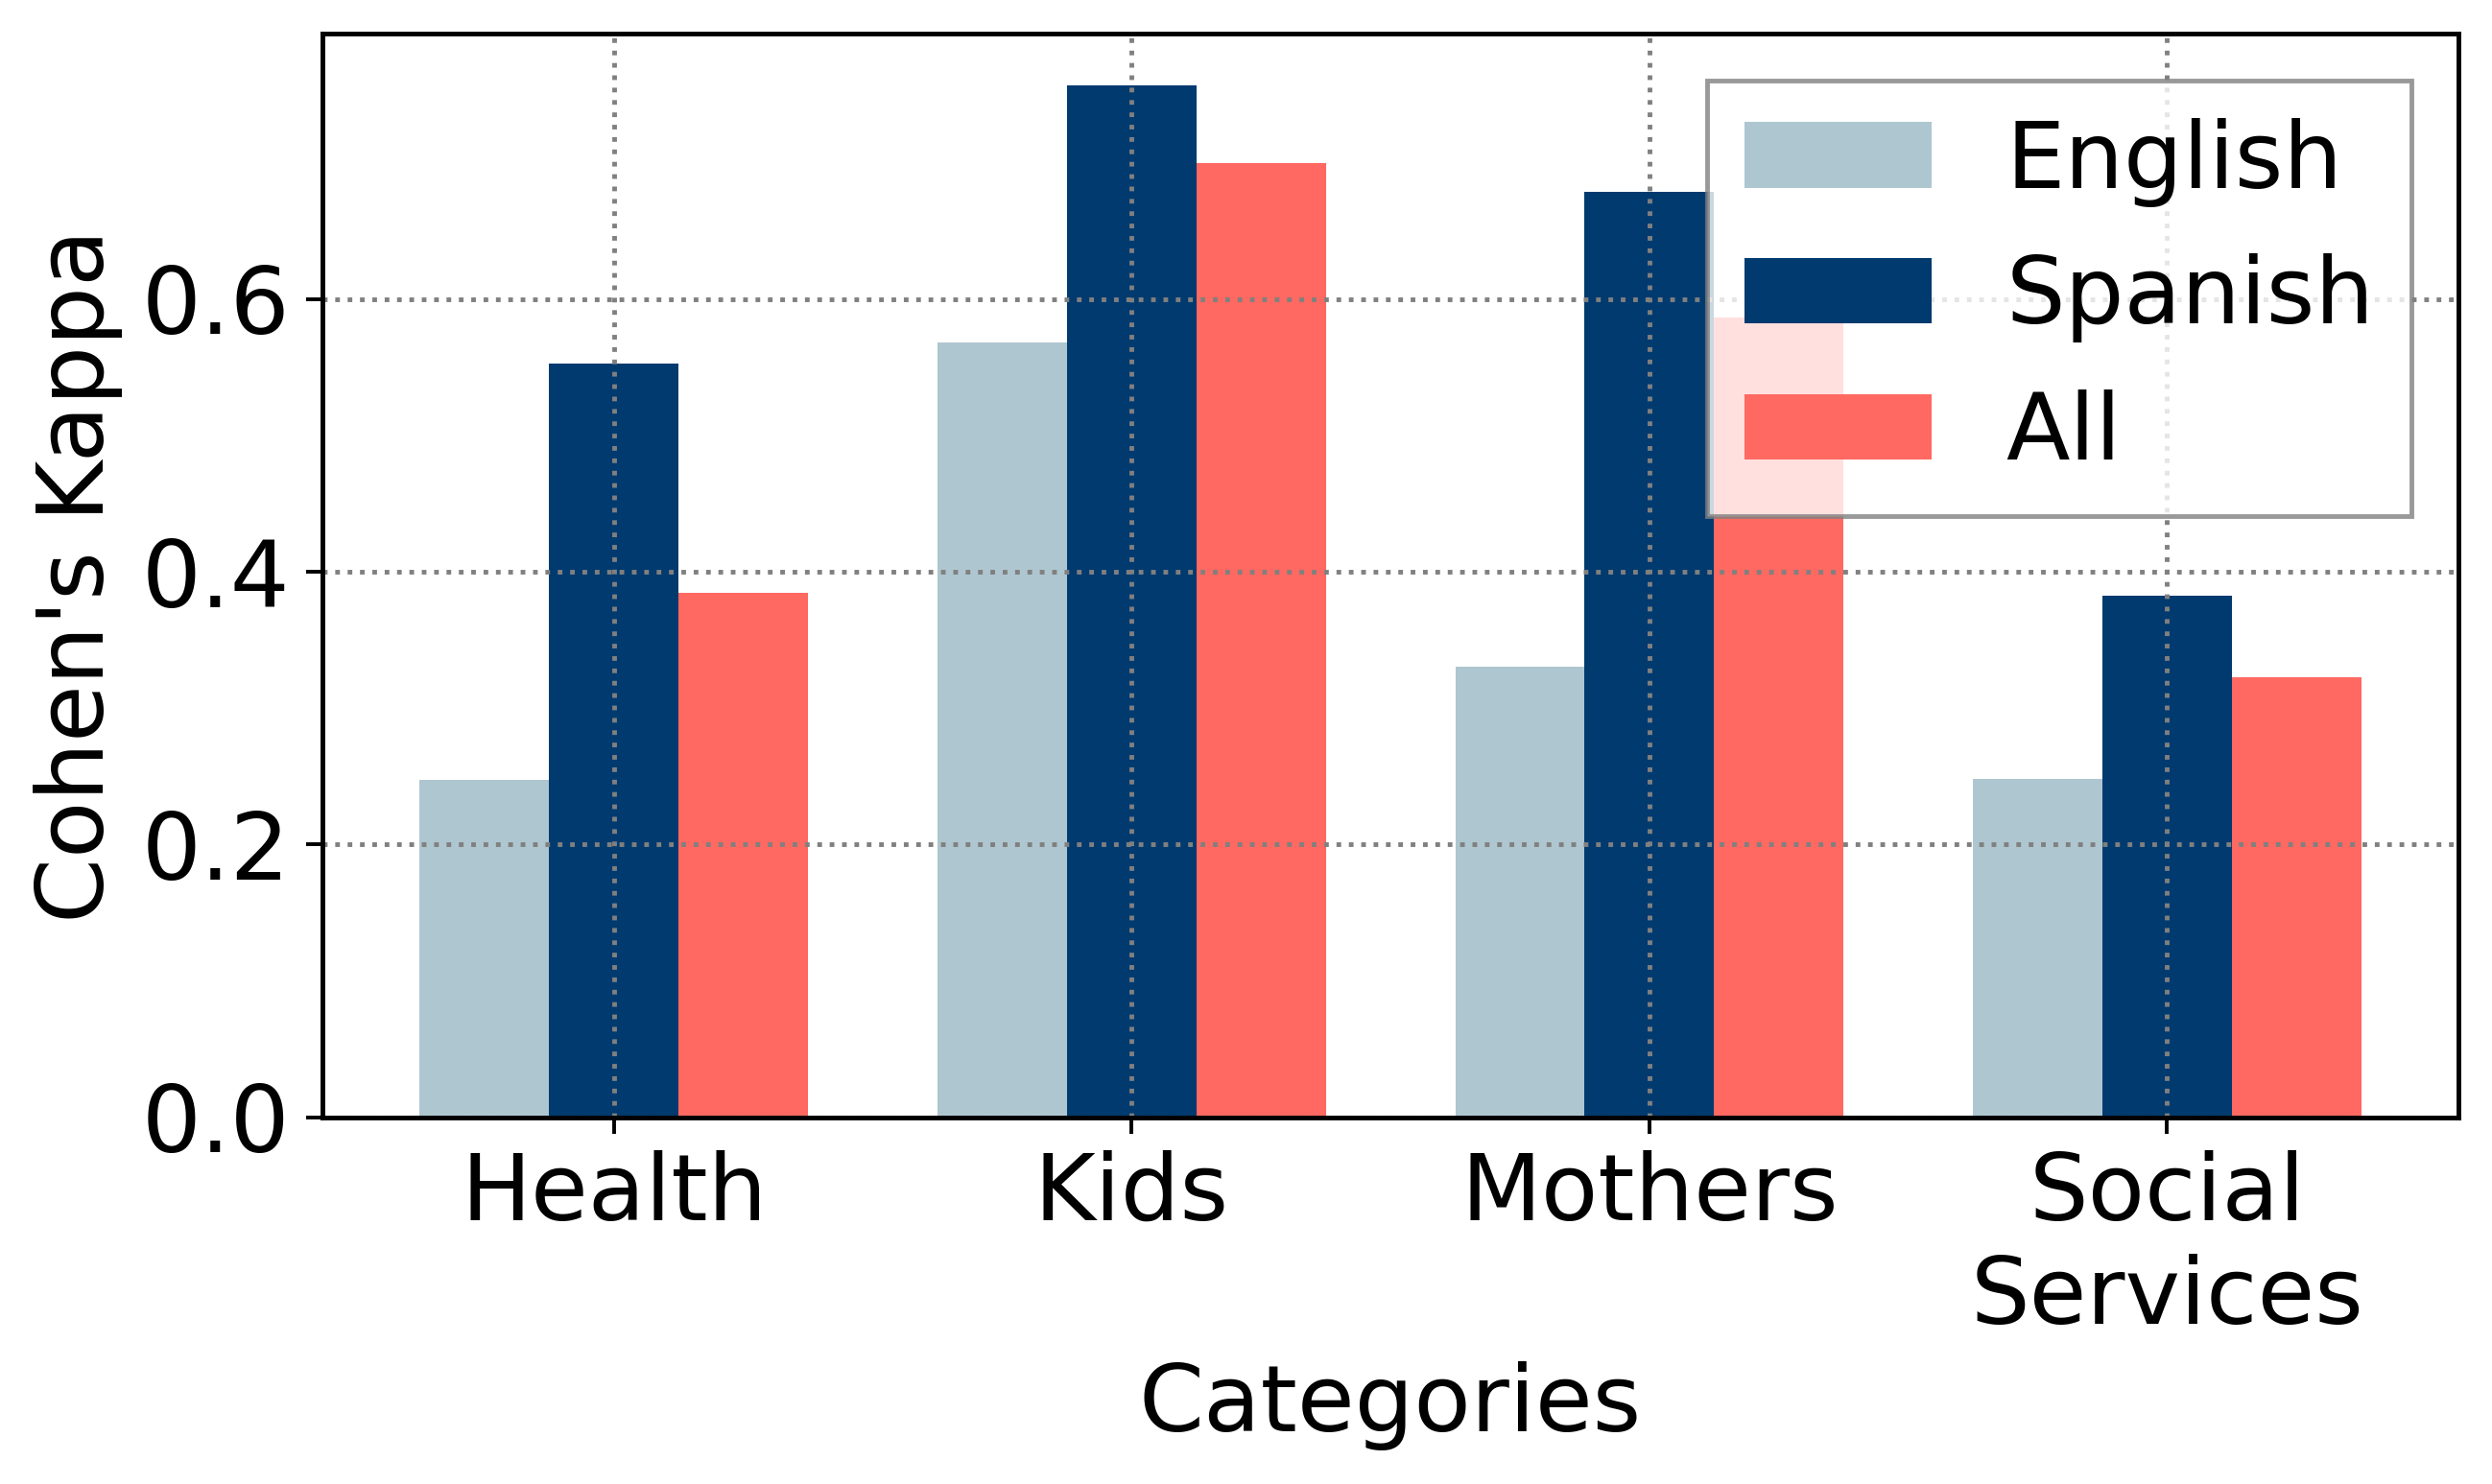

In [68]:
pastel_colors = ['#AEC6CF', '#003A6F', '#FF6961']
categories = ['Health', 'Kids', 'Mothers', 'Social\nServices']

# Setting up the bar positions
bar_width = 0.25
index = np.arange(len(categories))

# Creating the bar chart
plt.figure(figsize=(8, 5))

plt.bar(index, english_scores, bar_width, label='English', color=pastel_colors[0])
plt.bar(index + bar_width, spanish_scores, bar_width, label='Spanish', color=pastel_colors[1])
plt.bar(index + 2 * bar_width, all_scores, bar_width, label='All', color=pastel_colors[2])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel("Cohen's Kappa")
plt.xticks(index + bar_width, categories, rotation=0)  # No inclination
plt.legend()

plt.tight_layout()

plt.savefig("cohens_kappa.pdf")

plt.tight_layout()
plt.show()

In [172]:
filtered_df_en = df_second_en[df_second_en['label_y'].apply(tuple) == (0, 0, 0, 0)]
filtered_df_en.text_x

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Self-guided visits are available for groups of up to 50 people. Reservations are required for groups with more than 10 people.
3                                                                                                                                                                                                                                                                                                

## Remove documents labelled as "0,0,0,0"

In [2]:
pred_en = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_df_docs_predicted_EN.csv")
pred_en[["lemmas_x_x", "label", "predicted_label"]]

/tmp/ipykernel_4151896/3036443690.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  pred_en = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_df_docs_predicted_EN.csv")


,lemmas_x_x,label,predicted_label
0,order avoid future allergic_reaction range vom...,"[1, 1, 0, 0]",NaN
1,author_affiliations shinyi_wu phd university s...,"[1, 0, 0, 0]","[1, 0, 0, 0]"
2,review_feb good doctor,"[1, 0, 0, 0]","[1, 0, 0, 0]"
3,remove morning remove water balloon place syri...,"[1, 0, 0, 0]","[1, 0, 0, 0]"
4,risk factor child diagnose mis_c age year case...,"[1, 1, 0, 0]","[1, 1, 0, 0]"
...,...,...,...
1393092,overview photograph presence tumor vertebrae t...,"[1, 0, 0, 0]","[1, 0, 0, 0]"
1393093,pain bad day esi information technology begin ...,"[1, 0, 0, 0]","[1, 0, 0, 0]"
1393094,weaver parent promote healthy body image child...,"[1, 0, 0, 0]","[1, 0, 0, 0]"
1393095,choi_peter meyerson_matthew targeted genomic_r...,"[0, 0, 0, 0]","[0, 0, 0, 0]"


In [6]:
pred_es = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_df_docs_predicted_ES.csv")
pred_es[["lemmas_x_x", "label", "predicted_label"]]

/tmp/ipykernel_4151896/4016543933.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  pred_es = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/models/filtering/rosie_1_20/multi_df_docs_predicted_ES.csv")


,lemmas_x_x,label,predicted_label
0,causas interno oído contener célula_pilosa dim...,"[1, 0, 0, 0]","[1, 0, 0, 0]"
1,especial caso meduloblastomas desenlace relaci...,"[1, 1, 0, 0]",NaN
2,paciente glioma_difuso línea medio alteración ...,"[1, 1, 0, 0]","[1, 1, 0, 0]"
3,guía destinado facilitar coordinador utilícela...,"[0, 1, 0, 0]","[0, 1, 0, 0]"
4,recibir suspensión_liberación prolongado_azitr...,"[1, 0, 0, 0]","[1, 0, 0, 0]"
...,...,...,...
1062869,compromiso hepático hepatoesplenomegalia alter...,"[1, 1, 0, 0]","[1, 1, 0, 0]"
1062870,glioma vía óptico tipo glioma_grado crecimient...,"[1, 1, 0, 0]","[1, 1, 0, 0]"
1062871,gustar_donación deducible_impuesto vanguardia_...,"[1, 0, 0, 0]","[1, 0, 0, 0]"
1062872,licencia_alquiler previo archivado encontrar v...,"[0, 0, 0, 0]","[0, 0, 0, 0]"


In [7]:
# en
path_passages_en = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/corpus_strict_v3.0_en_compiled_passages_lang.parquet"
path_documents_en = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/corpus_strict_v3.0_en_compiled_documents_lang.parquet"

# es
path_passages_es = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/corpus_strict_v2.0_es_compiled_passages_lang.parquet"
path_documents_es = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/corpus_strict_v2.0_es_compiled_documents_lang.parquet"

# model
path_doc_model = "/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/translated/df_1.parquet"

In [8]:
df_docs_en = pd.read_parquet(path_documents_en)
df_docs_es = pd.read_parquet(path_documents_es)
df_pass_en = pd.read_parquet(path_passages_en)
df_pass_es = pd.read_parquet(path_passages_es)

In [10]:
df_doc_model = pd.read_parquet(path_doc_model)
df_doc_model["document_id"] = df_doc_model["doc_id"].apply(lambda x:int(x.split("_")[-1].split("-")[0])) #int(x.split("_")[1])
df_doc_model_en = df_doc_model[df_doc_model.doc_id.str.contains("EN")]
df_doc_model_es = df_doc_model[df_doc_model.doc_id.str.contains("ES")]
df_doc_model_es = df_doc_model_es.merge(df_docs_es[['document_id', 'contents']], on='document_id', how='left')
df_doc_model_es.rename(columns={'contents': 'full_doc'}, inplace=True)
df_doc_model_en = df_doc_model_en.merge(df_docs_en[['document_id', 'contents']], on='document_id', how='left')
df_doc_model_en.rename(columns={'contents': 'full_doc'}, inplace=True)
df_doc_model_es = df_doc_model_es.sort_index()
df_doc_model_en = df_doc_model_en.sort_index()

In [70]:
columns_keep = ['id_top', 'doc_id', 'id_preproc_x', 'document_id', 'text_x', 'len', 'full_doc_x', 'label', 'human_labeled','label_pred', 'predicted_label', 'lemmas', 'lemmas_tr', 'text_tr', 'lang']
merged_df_en = pred_en.merge(df_doc_model_en, on="doc_id", how="left")[columns_keep]
merged_df_en["final_label"] = merged_df_en.apply(lambda x: x["label"] if x["human_labeled"] else x["predicted_label"], axis=1)
merged_df_en = merged_df_en.drop(["label", "label_pred", "predicted_label"],axis=1)
merged_df_en.head()

,id_top,doc_id,id_preproc_x,document_id,text_x,len,full_doc_x,human_labeled,lemmas,lemmas_tr,text_tr,lang,final_label
0,0,EN_607595_99219-9,0,99219,In order to avoid future allergic reactions – ...,24,"Published on For 12-year-old Rani, living with...",True,order avoid future allergic_reaction range vom...,evitar futuro reacción_alérgico vómito urticar...,"Para evitar futuras reacciones alérgicas, que ...",EN,"[1, 1, 0, 0]"
1,1,EN_183633_46512-40,1,46512,"Author Affiliations: Shinyi Wu, PhD, Universit...",18,Development of a Clinical Forecasting Model to...,False,author_affiliations shinyi_wu phd university s...,author_afiliations shinyi_wu phd university_of...,"Author Afiliations: Shinyi Wu, PhD, University...",EN,"[1, 0, 0, 0]"
2,2,EN_854328_122182-27,2,122182,"Reviewed on Feb 24, 2023: He is a very good do...",3,Treatment & Services - Clinical Trials - Cyste...,False,review_feb good doctor,reviewed_on feb médico,"Reviewed on Feb 24, 2023: Es un médico muy bueno.",EN,"[1, 0, 0, 0]"
3,3,EN_1361170_297168-6,3,297168,"Removing the catheter:\n- In the morning, remo...",41,Nighttime bladder emptying keeps bladder press...,False,remove morning remove water balloon place syri...,quitar mañana quitar sacar agua globo coloquir...,"Quitar el catéter:\n- Por la mañana, quitar el...",EN,"[1, 0, 0, 0]"
4,4,EN_1091308_196292-20,4,196292,Risk factors: Children diagnosed with MIS-C ar...,17,Overview Multisystem inflammatory syndrome in ...,False,risk factor child diagnose mis_c age year old ...,factor_riesgo niño diagnosticado soler año eda...,Factores de riesgo: Los niños diagnosticados c...,EN,"[1, 1, 0, 0]"


In [71]:
merged_df_es = pred_es.merge(df_doc_model_es, on="doc_id", how="left")[columns_keep]
merged_df_es["final_label"] = merged_df_es.apply(lambda x: x["label"] if x["human_labeled"] else x["predicted_label"], axis=1)
merged_df_es = merged_df_es.drop(["label", "label_pred", "predicted_label"],axis=1)
merged_df_es.head()

,id_top,doc_id,id_preproc_x,document_id,text_x,len,full_doc_x,human_labeled,lemmas,lemmas_tr,text_tr,lang,final_label
0,0,ES_953747_124620-3,0,124620,Causas: La parte interna del oído contiene cél...,13,Es un tipo de pérdida de la audición (hipoacus...,False,causas interno oído contener célula_pilosa dim...,cause inner_ear contain tiny hair cell nerve d...,Causes: The inner part of the ear contains tin...,ES,"[1, 0, 0, 0]"
1,1,ES_490955_64059-16,1,64059,"Cada vez está más claro, en especial en el cas...",36,Tratamiento del meduloblastoma y otros tumores...,True,especial caso meduloblastomas desenlace relaci...,information technology clear case meduloblasto...,"It is becoming increasingly clear, especially ...",ES,"[1, 1, 0, 0]"
2,2,ES_533943_64846-86,2,64846,Los pacientes con glioma difuso de línea media...,9,Tratamiento de gliomas (incluso astrocitomas) ...,False,paciente glioma_difuso línea medio alteración ...,patient medium line diffuse_glioma impairment ...,Patients with medium-line diffuse glioma with ...,ES,"[1, 1, 0, 0]"
3,3,ES_44759_12033-16,3,12033,Esta guía está destinada a facilitar el trabaj...,24,Introducción La Oficina Nacional de Head Start...,False,guía destinado facilitar coordinador utilícela...,guide intend facilitate work coordinator infor...,This guide is intended to facilitate the work ...,ES,"[0, 1, 0, 0]"
4,4,ES_1012862_127780-5,4,127780,Si recibe la suspensión de liberación prolonga...,34,¿Para cuáles condiciones o enfermedades se pre...,False,recibir suspensión_liberación prolongado_azitr...,receive azithromycin zmax prolong_release susp...,If you receive azithromycin (Zmax) prolonged r...,ES,"[1, 0, 0, 0]"


In [72]:
full_merged = pd.concat([merged_df_en, merged_df_es]).reset_index(drop=True)
full_merged["common_id"] = range(1, len(full_merged) + 1)
full_merged["final_label"] = full_merged["final_label"].apply(lambda x: ast.literal_eval(x))
full_merged = full_merged.rename(
    columns={
        "id_preproc_x": "id_preproc",
        "text_x": "text",
        "full_doc_x": "full_doc"
    }
)
full_merged.head()

,id_top,doc_id,id_preproc,document_id,text,len,full_doc,human_labeled,lemmas,lemmas_tr,text_tr,lang,final_label,common_id
0,0,EN_607595_99219-9,0,99219,In order to avoid future allergic reactions – ...,24,"Published on For 12-year-old Rani, living with...",True,order avoid future allergic_reaction range vom...,evitar futuro reacción_alérgico vómito urticar...,"Para evitar futuras reacciones alérgicas, que ...",EN,"[1, 1, 0, 0]",1
1,1,EN_183633_46512-40,1,46512,"Author Affiliations: Shinyi Wu, PhD, Universit...",18,Development of a Clinical Forecasting Model to...,False,author_affiliations shinyi_wu phd university s...,author_afiliations shinyi_wu phd university_of...,"Author Afiliations: Shinyi Wu, PhD, University...",EN,"[1, 0, 0, 0]",2
2,2,EN_854328_122182-27,2,122182,"Reviewed on Feb 24, 2023: He is a very good do...",3,Treatment & Services - Clinical Trials - Cyste...,False,review_feb good doctor,reviewed_on feb médico,"Reviewed on Feb 24, 2023: Es un médico muy bueno.",EN,"[1, 0, 0, 0]",3
3,3,EN_1361170_297168-6,3,297168,"Removing the catheter:\n- In the morning, remo...",41,Nighttime bladder emptying keeps bladder press...,False,remove morning remove water balloon place syri...,quitar mañana quitar sacar agua globo coloquir...,"Quitar el catéter:\n- Por la mañana, quitar el...",EN,"[1, 0, 0, 0]",4
4,4,EN_1091308_196292-20,4,196292,Risk factors: Children diagnosed with MIS-C ar...,17,Overview Multisystem inflammatory syndrome in ...,False,risk factor child diagnose mis_c age year old ...,factor_riesgo niño diagnosticado soler año eda...,Factores de riesgo: Los niños diagnosticados c...,EN,"[1, 1, 0, 0]",5


In [73]:
full_merged_filtered_0 = full_merged[#
    ~(full_merged['final_label'].apply(tuple) == (0, 0, 0, 0))
]#~
len(full_merged_filtered_0)

2095308

In [74]:
full_merged_filtered_0.head()

,id_top,doc_id,id_preproc,document_id,text,len,full_doc,human_labeled,lemmas,lemmas_tr,text_tr,lang,final_label,common_id
0,0,EN_607595_99219-9,0,99219,In order to avoid future allergic reactions – ...,24,"Published on For 12-year-old Rani, living with...",True,order avoid future allergic_reaction range vom...,evitar futuro reacción_alérgico vómito urticar...,"Para evitar futuras reacciones alérgicas, que ...",EN,"[1, 1, 0, 0]",1
1,1,EN_183633_46512-40,1,46512,"Author Affiliations: Shinyi Wu, PhD, Universit...",18,Development of a Clinical Forecasting Model to...,False,author_affiliations shinyi_wu phd university s...,author_afiliations shinyi_wu phd university_of...,"Author Afiliations: Shinyi Wu, PhD, University...",EN,"[1, 0, 0, 0]",2
2,2,EN_854328_122182-27,2,122182,"Reviewed on Feb 24, 2023: He is a very good do...",3,Treatment & Services - Clinical Trials - Cyste...,False,review_feb good doctor,reviewed_on feb médico,"Reviewed on Feb 24, 2023: Es un médico muy bueno.",EN,"[1, 0, 0, 0]",3
3,3,EN_1361170_297168-6,3,297168,"Removing the catheter:\n- In the morning, remo...",41,Nighttime bladder emptying keeps bladder press...,False,remove morning remove water balloon place syri...,quitar mañana quitar sacar agua globo coloquir...,"Quitar el catéter:\n- Por la mañana, quitar el...",EN,"[1, 0, 0, 0]",4
4,4,EN_1091308_196292-20,4,196292,Risk factors: Children diagnosed with MIS-C ar...,17,Overview Multisystem inflammatory syndrome in ...,False,risk factor child diagnose mis_c age year old ...,factor_riesgo niño diagnosticado soler año eda...,Factores de riesgo: Los niños diagnosticados c...,EN,"[1, 1, 0, 0]",5


In [75]:
full_merged_filtered_0.to_parquet("/export/usuarios_ml4ds/lbartolome/Repos/umd/LinQAForge/data/source/corpus_rosie/passages/multi_blade_filtered_v2/df_1.parquet")

In [77]:
full_merged_filtered_0

,id_top,doc_id,id_preproc,document_id,text,len,full_doc,human_labeled,lemmas,lemmas_tr,text_tr,lang,final_label,common_id
0,0,EN_607595_99219-9,0,99219,In order to avoid future allergic reactions – ...,24,"Published on For 12-year-old Rani, living with...",True,order avoid future allergic_reaction range vom...,evitar futuro reacción_alérgico vómito urticar...,"Para evitar futuras reacciones alérgicas, que ...",EN,"[1, 1, 0, 0]",1
1,1,EN_183633_46512-40,1,46512,"Author Affiliations: Shinyi Wu, PhD, Universit...",18,Development of a Clinical Forecasting Model to...,False,author_affiliations shinyi_wu phd university s...,author_afiliations shinyi_wu phd university_of...,"Author Afiliations: Shinyi Wu, PhD, University...",EN,"[1, 0, 0, 0]",2
2,2,EN_854328_122182-27,2,122182,"Reviewed on Feb 24, 2023: He is a very good do...",3,Treatment & Services - Clinical Trials - Cyste...,False,review_feb good doctor,reviewed_on feb médico,"Reviewed on Feb 24, 2023: Es un médico muy bueno.",EN,"[1, 0, 0, 0]",3
3,3,EN_1361170_297168-6,3,297168,"Removing the catheter:\n- In the morning, remo...",41,Nighttime bladder emptying keeps bladder press...,False,remove morning remove water balloon place syri...,quitar mañana quitar sacar agua globo coloquir...,"Quitar el catéter:\n- Por la mañana, quitar el...",EN,"[1, 0, 0, 0]",4
4,4,EN_1091308_196292-20,4,196292,Risk factors: Children diagnosed with MIS-C ar...,17,Overview Multisystem inflammatory syndrome in ...,False,risk factor child diagnose mis_c age year old ...,factor_riesgo niño diagnosticado soler año eda...,Factores de riesgo: Los niños diagnosticados c...,EN,"[1, 1, 0, 0]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455965,1062897,ES_164877_37698-22,1062897,37698,Cuando se usa para detectar cáncer colorrectal...,12,Cáncer colorrectal: ¿Qué prueba de detección d...,False,detectar cáncer_colorrectal prueba año hacer é...,detect colorectal_cancer test year test year f...,"When used to detect colorectal cancer, this te...",ES,"[1, 1, 1, 0]",2455966
2455966,1062898,ES_34067_11078-56,1062898,11078,"El compromiso hepático está dado, principalmen...",15,Realizar una revisión narrativa no sistemática...,False,compromiso hepático hepatoesplenomegalia alter...,liver involvement_hepatosplenomegaly liver pro...,Liver involvement is mainly due to hepatosplen...,ES,"[1, 1, 0, 0]",2455967
2455967,1062899,ES_491927_64077-5,1062899,64077,El glioma de la vía óptica es un tipo de gliom...,11,Gliomas infantiles (incluso astrocitomas) Los ...,False,glioma vía óptico tipo glioma_grado crecimient...,optical_glioma low grade_glioma slow_growth oc...,Optical glioma is a type of low-grade glioma (...,ES,"[1, 1, 0, 0]",2455968
2455968,1062900,ES_408122_50072-0,1062900,50072,¿Te gustaría hacer una donación deducible de i...,5,¿Te gustaría hacer una donación deducible de i...,False,gustar_donación deducible_impuesto vanguardia_...,tax_deductible donation_cut edge_research medi...,Would you like to make a tax-deductible donati...,ES,"[1, 0, 0, 0]",2455969
